# Price Action Model for Short Term Scalping

## What is Price Action

According to  [Investopedia](https://www.investopedia.com/terms/p/price-action.asp), Price action is the movement of a security's price plotted over time. Price action forms the basis for all technical analyses of a stock, commodity, or other asset charts.

![](https://www.investopedia.com/thmb/po6XWr9rdPVQ3770NhFBqFVDly4=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/Price-action-aad4a749432f45b3ab1eb927e69177f6.jpg)

Many short-term traders rely exclusively on price action and the formations and trends extrapolated from it to make trading decisions. Technical analysis as a practice is a derivative of price action since it uses past prices in calculations that can then be used to inform trading decisions.

## Why & How Price Action Work?

Of course there's nothing work all the time, but there is something works some times. short-term traders (scalpers) uses Price Action theory and try to read the market movement and profit out of it based on the following general principles or assumptions.

### 1. Market Discounts Everything
- Price reflects all available information, including news, earnings, economic data, and market sentiment.
- This assumption aligns with the Efficient Market Hypothesis (EMH) in that any new information will be quickly absorbed and reflected in the market price.

### 2. Human Behavior and Market Psychology are Predictable
- Traders believe patterns emerge in price movements due to consistent human behaviors such as fear, greed, and herd mentality.
- Support and resistance levels, trends, and patterns like head-and-shoulders or flags are thought to be visual representations of these behaviors.

### 3. Price Moves in Trends
- Markets do not move randomly but tend to trend in a certain direction (uptrend, downtrend, or sideways).
- Identifying these trends allows traders to position themselves advantageously, assuming that trends are more likely to continue than reverse.

### 4. History Repeats Itself
- Patterns observed in historical price data are assumed to repeat over time because market participants react in similar ways under similar circumstances.
- Chart patterns, candlestick formations, and other recurring setups are used to anticipate future price movements.

### 5. Supply and Demand Drive Prices
- Price action is believed to be a reflection of the balance (or imbalance) between supply and demand.
- Price rises when demand exceeds supply and falls when supply exceeds demand. This balance is visualized through candlesticks, volume, and price levels.

### 8. Risk Can Be Managed Without Prediction
- Rather than trying to predict exact outcomes, price action traders assume they can manage risk effectively by focusing on probabilities and reacting to what the market is currently doing.
- Stop losses and position sizing are essential tools in this approach.

These theories are not something out of thin air, and in fact people have made great summaries about Price Action in trading. If interested, feel free to check out the following books for more information.

- [*Trading Price Action series* by Al Brooks](https://www.amazon.ca/stores/Al-Brooks/author/B001JSEI4Q?ref=ap_rdr&isDramIntegrated=true&shoppingPortalEnabled=true)
- [*Understanding Price Action: practical analysis of the 5-minute time frame* by Bob Volman](https://www.amazon.ca/Understanding-Price-Action-practical-analysis/dp/908227860X?ref_=ast_author_dp)

## Goal of this Sub-project

We want to implement a strategy that focuses on leveraging price action patterns, particularly pullbacks within trends, to identify reliable trade entries. Coupled with disciplined risk management, the goal is to maintain a win rate of at least 60% while adhering to a 1:1 risk-reward ratio. Through this exercise we show the effectiveness of human discretion in trading, demonstrating that simple, intuitive methods can still outperform complex and conceptually demanding models, such as those based on machine learning, in practical application.

## Install and Import

In [1]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.2 MB/s eta 0:00:00


In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt
import json

## Load 5 minute interval price data for ES ([E-mini S&P 500 Futures](https://www.cmegroup.com/markets/equities/sp/e-mini-sandp500.html))

In [3]:
drive.mount('/content/drive')
es_path = '/content/drive/MyDrive/545 Project/stock_data_5_min_interval_10000_bars/CME_MINI_ES1!, 5_5a8c9.csv'

Mounted at /content/drive


In [4]:
df_es = pd.read_csv(es_path)

## Data preprocessing

- We will need to rename the columns so that it works with `mplfinance` for visualization.vars
- We will also need to set index as the time, and convert the timezone to `America/New_York`

In [5]:
# Data preprocessing
def data_preprocessor(df):
    """
    Preprocesses a DataFrame for financial data analysis, ensuring proper column names,
    timezone conversion, and setting the time column as the index.

    Parameters:
    -----------
    df : pandas.DataFrame
        A DataFrame containing financial data with columns: 'open', 'high', 'low', 'close', 'Volume', and 'time'.
        The 'time' column should be a string or datetime object representing the timestamp for each row.

    Returns:
    --------
    pandas.DataFrame
        A new DataFrame with the following transformations applied:
        - Columns renamed to: 'Open', 'High', 'Low', 'Close', 'Volume'.
        - 'time' column converted to a datetime object, adjusted to the 'America/New_York' timezone.
        - 'time' column set as the index of the DataFrame.
    """
    # Create a copy of the original DataFrame to avoid modifying it
    ret = df.copy()

    # Rename columns to match expected format for financial analysis
    ret.rename(columns={
        'open': 'Open',
        'high': 'High',
        'low': 'Low',
        'close': 'Close',
        'Volume': 'Volume'
    }, inplace=True)

    # Convert the 'time' column to datetime and adjust for the 'America/New_York' timezone
    ret['time'] = pd.to_datetime(ret['time'], utc=True).dt.tz_convert('America/New_York')

    # Set the 'time' column as the index of the DataFrame
    ret.set_index('time', inplace=True)

    return ret


## Create indicators

### Pivots
A high pivot is a price point that forms when the market creates a peak. It signifies a temporary resistance level where prices have been rejected and start to move lower.

Similarly, a low pivot is a price point where the market forms a trough or bottom. It represents a temporary support level where prices stop falling and start to rise.

Pivots are useful to:
1. Trend Identification:

  - A series of higher pivot highs and higher pivot lows signals an uptrend.
  - A series of lower pivot highs and lower pivot lows signals a downtrend.
2. Support and Resistance:

  - High pivots often act as resistance levels, while low pivots act as support levels.
3. Reversal Points:

  - Pivots can mark potential reversal zones, helping traders enter or exit positions.
4. Pattern Formation:
  - Pivot highs and lows contribute to technical patterns like double tops/bottoms, head and shoulders, and more.

However, to reduce complexity, we didn't directly use Pivots in the strategy.

### MACD
![](https://www.keenbase-trading.com/wp-content/uploads/2024/06/how-to-find-the-best-macd-settings.jpg)

[Moving average convergence/divergence (MACD)](https://www.investopedia.com/terms/m/macd.asp#:~:text=Key%20Takeaways,EMA%20of%20the%20MACD%20line.) is a technical indicator to help investors identify entry points for buying or selling. The MACD line is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA. The signal line is a nine-period EMA of the MACD line. Formula:

`MACD = 12-Period EMA − 26-Period EMA`

`Signal = 9-Period MACD`

We can use MACD to identify trend and measure the strength of the trend:

1. Crossover Signals:

  - Bullish Crossover: When the MACD Line crosses above the Signal Line, it may signal an upward momentum and a potential buy signal.
  - Bearish Crossover: When the MACD Line crosses below the Signal Line, it may indicate downward momentum and a potential sell signal.
2. Zero Line Cross:

  - When the MACD Line crosses above the zero line, it signals a bullish trend.
  - When the MACD Line crosses below the zero line, it signals a bearish trend.
3. Divergence:

  - Bullish Divergence: When the price makes lower lows but the MACD makes higher lows, it suggests a potential reversal to the upside.
  - Bearish Divergence: When the price makes higher highs but the MACD makes lower highs, it indicates a potential reversal to the downside.

In our model/strategy, we will focus on 2 and 3 using MACD line to identify trend and temporary pullbacks, and most importantly we find entry point when pullbacks is reversed and trend is resumed.

### Trend detection based on MACD to identify pullbacks

![](https://patternswizard.com/wp-content/uploads/2021/09/pullback.png.webp)

Simply put, we want to find a pattern where MACD sees a directional change （Monotonically increasing or decreasing） for 5 consecutive bars (in 25 min), then in the most recent 6th bar it start to move in opposite direction.


1. Pullback bounce up in upward trend:

  When MACD is (a) monotonically decreasing for at least 5 bars, (b) and most recent bar closed with its MACD value greater than the MACD value of the bar before, (c) and the to most recent MACD values are above 0 line. Then we say the current bar is the signal bar, and next bar is the entry bar, we make an entry with the open price of entry bar.

```
((macd.shift(5) > macd.shift(4)) &
  (macd.shift(4) > macd.shift(3)) &
  (macd.shift(3) > macd.shift(2)) &
  (macd.shift(2) < macd.shift(1)) &
  (macd.shift(2) > 0))
```

2. Pullback bounce down in downward trend:

  In this case every thing is similar, to previous case, but the in the opposite direction.

We will use such pattern recognition to create two seires boolean variables for each bar with timestamp as index. For example, for the upward trend pullback signal series, when it's true then it signifies that the corresponding bar at that timestamp is signal bar, we make an long entry in next bar. Similarly we do the opposite for downward trend pullback signal series.

However, we noticed that the underlying S&P 500 index is always bullish in longer time frame, the strategy is more effective in long entries vs short entries. So we will only keep long trades in this exercise.



In [6]:

# Function to calculate pivot high and low
def calculate_pivots(df, lb=5, rb=5):
    """
    Identifies pivot highs and lows in the dataframe.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame with 'High' and 'Low' columns.
    lb : int
        Number of bars to the left of the pivot to consider.
    rb : int
        Number of bars to the right of the pivot to consider.

    Returns:
    --------
    pivots_high : pandas.Series
        Series containing the pivot high values.
    pivots_low : pandas.Series
        Series containing the pivot low values.
    """
    pivots_high = df['High'][(df['High'] == df['High'].rolling(window=lb+rb+1, center=True).max())]
    pivots_low = df['Low'][(df['Low'] == df['Low'].rolling(window=lb+rb+1, center=True).min())]
    return pivots_high, pivots_low

# Function to calculate MACD
def calculate_macd(df, fast_length=12, slow_length=26, signal_length=9):
    """
    Calculates the MACD and Signal Line.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame with 'Close' column.
    fast_length : int
        The length of the fast moving average.
    slow_length : int
        The length of the slow moving average.
    signal_length : int
        The length of the signal line.

    Returns:
    --------
    macd : pandas.Series
        The MACD line.
    signal : pandas.Series
        The signal line.
    hist : pandas.Series
        The MACD histogram (difference between MACD and signal line).
    """
    fast_ma = df['Close'].ewm(span=fast_length, adjust=False).mean()
    slow_ma = df['Close'].ewm(span=slow_length, adjust=False).mean()
    macd = fast_ma - slow_ma
    signal = macd.ewm(span=signal_length, adjust=False).mean()
    hist = macd - signal
    return macd, signal, hist

# Function to identify trend changes based on MACD histogram
def identify_trend_changes(macd):
    """
    Identifies trend changes based on the MACD histogram.

    Parameters:
    -----------
    macd : pandas.Series
        The MACD values.

    Returns:
    --------
    pullback_bounce_up : pandas.Series
        Series indicating pullback bounce ups.
    pullback_bounce_dn : pandas.Series
        Series indicating pullback bounce downs.
    """
    pullback_bounce_up = ((macd.shift(5) > macd.shift(4)) &
                          (macd.shift(4) > macd.shift(3)) &
                          (macd.shift(3) > macd.shift(2)) &
                          (macd.shift(2) < macd.shift(1)) &
                          (macd.shift(2) > 0))

    pullback_bounce_dn = ((macd.shift(5) < macd.shift(4)) &
                          (macd.shift(4) < macd.shift(3)) &
                          (macd.shift(3) < macd.shift(2)) &
                          (macd.shift(2) > macd.shift(1)) &
                          (macd.shift(2) < 0))

    return pullback_bounce_up, pullback_bounce_dn

## Visualize indicators with candlestick chart

In here, we utilize mplfinance to visualize the price in candlestick chart with the indicators we created above.

In [7]:
def plot_candlestick_with_indicators(df, pivots_high, pivots_low, pullback_bounce_up, pullback_bounce_dn, macd, signal, hist, ticker_name):
    """
    Plots the candlestick chart along with support/resistance lines, MACD, and trend signals using mplfinance.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the price data.
    pivots_high : pandas.Series
        Series containing the pivot highs.
    pivots_low : pandas.Series
        Series containing the pivot lows.
    pullback_bounce_up : pandas.Series
        Series indicating pullback bounce ups.
    pullback_bounce_dn : pandas.Series
        Series indicating pullback bounce downs.
    macd : pandas.Series
        The MACD line.
    hist : pandas.Series
        The MACD histogram.
    """

    # Align the indices of the indicators with df's index
    pivots_high = pivots_high.reindex(df.index)
    pivots_low = pivots_low.reindex(df.index)
    pullback_bounce_up = pullback_bounce_up.reindex(df.index)
    pullback_bounce_dn = pullback_bounce_dn.reindex(df.index)
    macd = macd.reindex(df.index)
    hist = hist.reindex(df.index)

    # Define the additional plots for the indicators
    apds = []

    # Pivot High and Low
    apds.append(mpf.make_addplot(pivots_high, type='scatter', markersize=50, marker='$H$', color='black'))
    apds.append(mpf.make_addplot(pivots_low, type='scatter', markersize=50, marker='$L$', color='black'))
    pullbacks = df.copy()
    pullbacks['bounce_up'] = (pullbacks['Low'] - 5) * pullback_bounce_up
    pullbacks['bounce_up'] = pullbacks['bounce_up'].apply(lambda x: None if x == 0 else x)
    pullbacks['bounce_dn'] = (pullbacks['High'] + 5) * pullback_bounce_dn
    pullbacks['bounce_dn'] = pullbacks['bounce_dn'].apply(lambda x: None if x == 0 else x)

    # # Pullback Bounce Up and Down
    apds.append(mpf.make_addplot(pullbacks['bounce_up'], type='scatter', markersize=50, marker='^', color='green'))
    apds.append(mpf.make_addplot(pullbacks['bounce_dn'], type='scatter', markersize=50, marker='v', color='red'))

    # # # MACD and Signal line
    apds.append(mpf.make_addplot(macd, panel=2, color='#8CFF9E'))
    apds.append(mpf.make_addplot(signal, panel=2, color='#FF7779'))
    apds.append(mpf.make_addplot(hist, panel=2, type='bar', color='gray', alpha=0.3))

    # Plot using mplfinance with the additional indicators
    fig, axes = mpf.plot(
      df, type='candle', style='charles',
      volume=True, title='Five-Minute Candlestick with Indicators for: ' + ticker_name,
      ylabel="Price", addplot=apds, returnfig=True, figsize=(24, 16)
    )


## Execute strategy based on the indicators - back testing

Here we have the back testing helper fuction that simulates and evaluates a pullback trading strategy based on price bounces using the Open, High, Low, Close price data and the pullback signals.

1. Entry Conditions:

 - The strategy looks for pullback bounce signals:
  
    - pullback_bounce_up: Indicates a potential buy (long) opportunity.
  
    - pullback_bounce_dn: (Commented out) Could be used for sell (short) trades.
 - If a signal is triggered, the strategy enters a trade on the next bar's open price.
2. Exit Conditions:
  - Take Profit: If the price moves favorably by a specified amount (Default: 15 points).
  - Stop Loss: If the price moves against the trade by the same threshold (Default: -15 points).
3. Profit Calculation:

  - Each trade's profit/loss is calculated and added to the total profit. A multiplier (Default: 50 for E-Mini S&P 500 Futures) adjusts the profit/loss for the trading instrument.
4. Tracking Metrics:
  - Entry/Exit times and prices.
  - Profit/Loss.
  - Duration in bars.
  - Number of trades.
  - Percent profitable trades.
  - Net profit.
  - Maximum drawdown.
  - Average trade profit.
  - Average trade duration.





In [8]:
def execute_trading_strategy(df, pullback_bounce_up, pullback_bounce_dn, multiplier=50, stop_loss=15, take_profit=15):
    """
    Executes a trading strategy based on pullback bounces and track performance.

    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the OHLC data with 'Open', 'High', 'Low', 'Close' columns and Time as the index.
    pullback_bounce_up : pandas.Series
        A boolean Series indicating where pullback bounce up is true.
    pullback_bounce_dn : pandas.Series
        A boolean Series indicating where pullback bounce down is true.
    multiplier : int, optional
        The multiplier for profit/loss calculation (default is 50 for E-MINI S&P 500 Futures).
    stop_loss : float, optional
        The stop loss threshold in price points (default is 15).
    take_profit : float, optional
        The take profit threshold in price points (default is 15).

    Returns:
    --------
    performance_metrics : dict
        A dictionary containing trade performance metrics such as net profit, max drawdown,
        percentage profitable, etc.
    """
    # Initialize variables
    trades = []  # Store trades as (entry_time, entry_price, exit_time, exit_price, profit_loss)
    in_trade = False  # To track whether we are in a trade
    entry_price = 0  # The price at which the trade is entered
    entry_time = None  # The time at which the trade is entered
    trade_direction = None  # 1 for long, -1 for short
    total_profit = 0  # Total profit from trades
    max_drawdown = 0  # Maximum drawdown observed during the trades
    max_balance = 0  # Track the highest balance (to calculate max drawdown)
    trade_durations = []  # Track the duration of each trade in bars
    profit_losses = []  # Track profit and losses for each trade

    # Iterate through the dataframe to simulate trading strategy
    for i in range(1, len(df)):
        # If currently in a trade, check if we should exit
        if in_trade:
            # Check for exit conditions
            current_price = df['Close'].iloc[i]
            if trade_direction == 1:  # Long trade
                if current_price >= entry_price + take_profit:
                    # Take profit
                    exit_price = current_price
                    exit_time = df.index[i]
                    profit_loss = (exit_price - entry_price) * multiplier
                    trades.append((entry_time, entry_price, exit_time, exit_price, profit_loss))
                    in_trade = False
                    total_profit += profit_loss
                    profit_losses.append(profit_loss)
                    trade_durations.append(i - entry_bar)
                    max_balance = max(max_balance, total_profit)
                    max_drawdown = min(max_drawdown, total_profit - max_balance)
                elif current_price <= entry_price - stop_loss:
                    # Stop loss
                    exit_price = current_price
                    exit_time = df.index[i]
                    profit_loss = (exit_price - entry_price) * multiplier
                    trades.append((entry_time, entry_price, exit_time, exit_price, profit_loss))
                    in_trade = False
                    total_profit += profit_loss
                    profit_losses.append(profit_loss)
                    trade_durations.append(i - entry_bar)
                    max_balance = max(max_balance, total_profit)
                    max_drawdown = min(max_drawdown, total_profit - max_balance)
            # elif trade_direction == -1:  # Short trade
            #     if current_price <= entry_price - take_profit:
            #         # Take profit
            #         exit_price = current_price
            #         exit_time = df.index[i]
            #         profit_loss = (entry_price - exit_price) * multiplier
            #         trades.append((entry_time, entry_price, exit_time, exit_price, profit_loss))
            #         in_trade = False
            #         total_profit += profit_loss
            #         profit_losses.append(profit_loss)
            #         trade_durations.append(i - entry_bar)
            #         max_balance = max(max_balance, total_profit)
            #         max_drawdown = min(max_drawdown, total_profit - max_balance)
            #     elif current_price >= entry_price + stop_loss:
            #         # Stop loss
            #         exit_price = current_price
            #         exit_time = df.index[i]
            #         profit_loss = (entry_price - exit_price) * multiplier
            #         trades.append((entry_time, entry_price, exit_time, exit_price, profit_loss))
            #         in_trade = False
            #         total_profit += profit_loss
            #         profit_losses.append(profit_loss)
            #         trade_durations.append(i - entry_bar)
            #         max_balance = max(max_balance, total_profit)
            #         max_drawdown = min(max_drawdown, total_profit - max_balance)

        # Enter a new trade if not already in one
        if not in_trade:  # Only enter a new trade if not already in one
            if pullback_bounce_up.iloc[i-1]:
                # Long trade entry (next bar)
                entry_price = df['Open'].iloc[i]
                entry_time = df.index[i]
                trade_direction = 1  # Long trade
                entry_bar = i
                in_trade = True
            # elif pullback_bounce_dn.iloc[i-1]:
            #     # Short trade entry (next bar)
            #     entry_price = df['Open'].iloc[i]
            #     entry_time = df.index[i]
            #     trade_direction = -1  # Short trade
            #     entry_bar = i
            #     in_trade = True

    # Calculate performance metrics
    num_trades = len(trades)
    num_profitable_trades = len([x for x in profit_losses if x > 0])
    percent_profitable = (num_profitable_trades / num_trades) * 100 if num_trades > 0 else 0
    avg_trade_profit = np.mean(profit_losses) if num_trades > 0 else 0
    avg_trade_duration = np.mean(trade_durations) if num_trades > 0 else 0
    net_profit = total_profit

    performance_metrics = {
        'num_trades': num_trades,
        'percent_profitable': percent_profitable,
        'max_drawdown': max_drawdown,
        'avg_trade_profit': avg_trade_profit,
        'avg_trade_duration': avg_trade_duration,
        'net_profit': net_profit
    }

    # Plot performance metrics
    plt.figure(figsize=(14, 6))
    plt.subplot(2, 1, 1)
    plt.plot([x[2] for x in trades], [x[4] for x in trades], marker='o', color='b', label='Trade PnL')
    plt.xlabel('Exit Time')
    plt.ylabel('Profit/Loss')
    plt.title('Trade PnL Over Time')
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.plot([x[2] for x in trades], np.cumsum([x[4] for x in trades]), marker='o', color='g', label='Cumulative Profit')
    plt.xlabel('Exit Time')
    plt.ylabel('Cumulative Profit')
    plt.title('Cumulative Profit Over Time')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return performance_metrics

In [9]:
df_es_processed = data_preprocessor(df_es)
df_es_processed.head()

,Open,High,Low,Close,Higher Low,Higher High,Lower Low,Lower High,Shapes,Shapes.1,Volume,Histogram,MACD,Signal
time,,,,,,,,,,,,,,
2023-12-11 09:30:00-05:00,4602.25,4606.00,4599.75,4602.50,0.0,0.0,0.0,0.0,0,0,23017,NaN,NaN,NaN
2023-12-11 09:35:00-05:00,4602.50,4607.50,4600.25,4607.00,0.0,0.0,0.0,0.0,0,0,11705,NaN,NaN,NaN
2023-12-11 09:40:00-05:00,4607.25,4608.50,4605.50,4605.75,0.0,0.0,0.0,0.0,0,0,6945,NaN,NaN,NaN
2023-12-11 09:45:00-05:00,4606.00,4608.50,4605.50,4607.00,0.0,0.0,0.0,0.0,0,0,6623,NaN,NaN,NaN
2023-12-11 09:50:00-05:00,4607.00,4608.75,4606.00,4606.25,0.0,0.0,0.0,0.0,0,0,6170,NaN,NaN,NaN


In [10]:
df_es_processed.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20097 entries, 2023-12-11 09:30:00-05:00 to 2024-12-05 16:10:00-05:00
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         20097 non-null  float64
 1   High         20097 non-null  float64
 2   Low          20097 non-null  float64
 3   Close        20097 non-null  float64
 4   Higher Low   20092 non-null  float64
 5   Higher High  20092 non-null  float64
 6   Lower Low    20092 non-null  float64
 7   Lower High   20092 non-null  float64
 8   Shapes       20097 non-null  int64  
 9   Shapes.1     20097 non-null  int64  
 10  Volume       20097 non-null  int64  
 11  Histogram    20064 non-null  float64
 12  MACD         20072 non-null  float64
 13  Signal       20064 non-null  float64
dtypes: float64(11), int64(3)
memory usage: 2.3 MB


## Put things together

### Visualizing the price and indicators for tail 360 bars

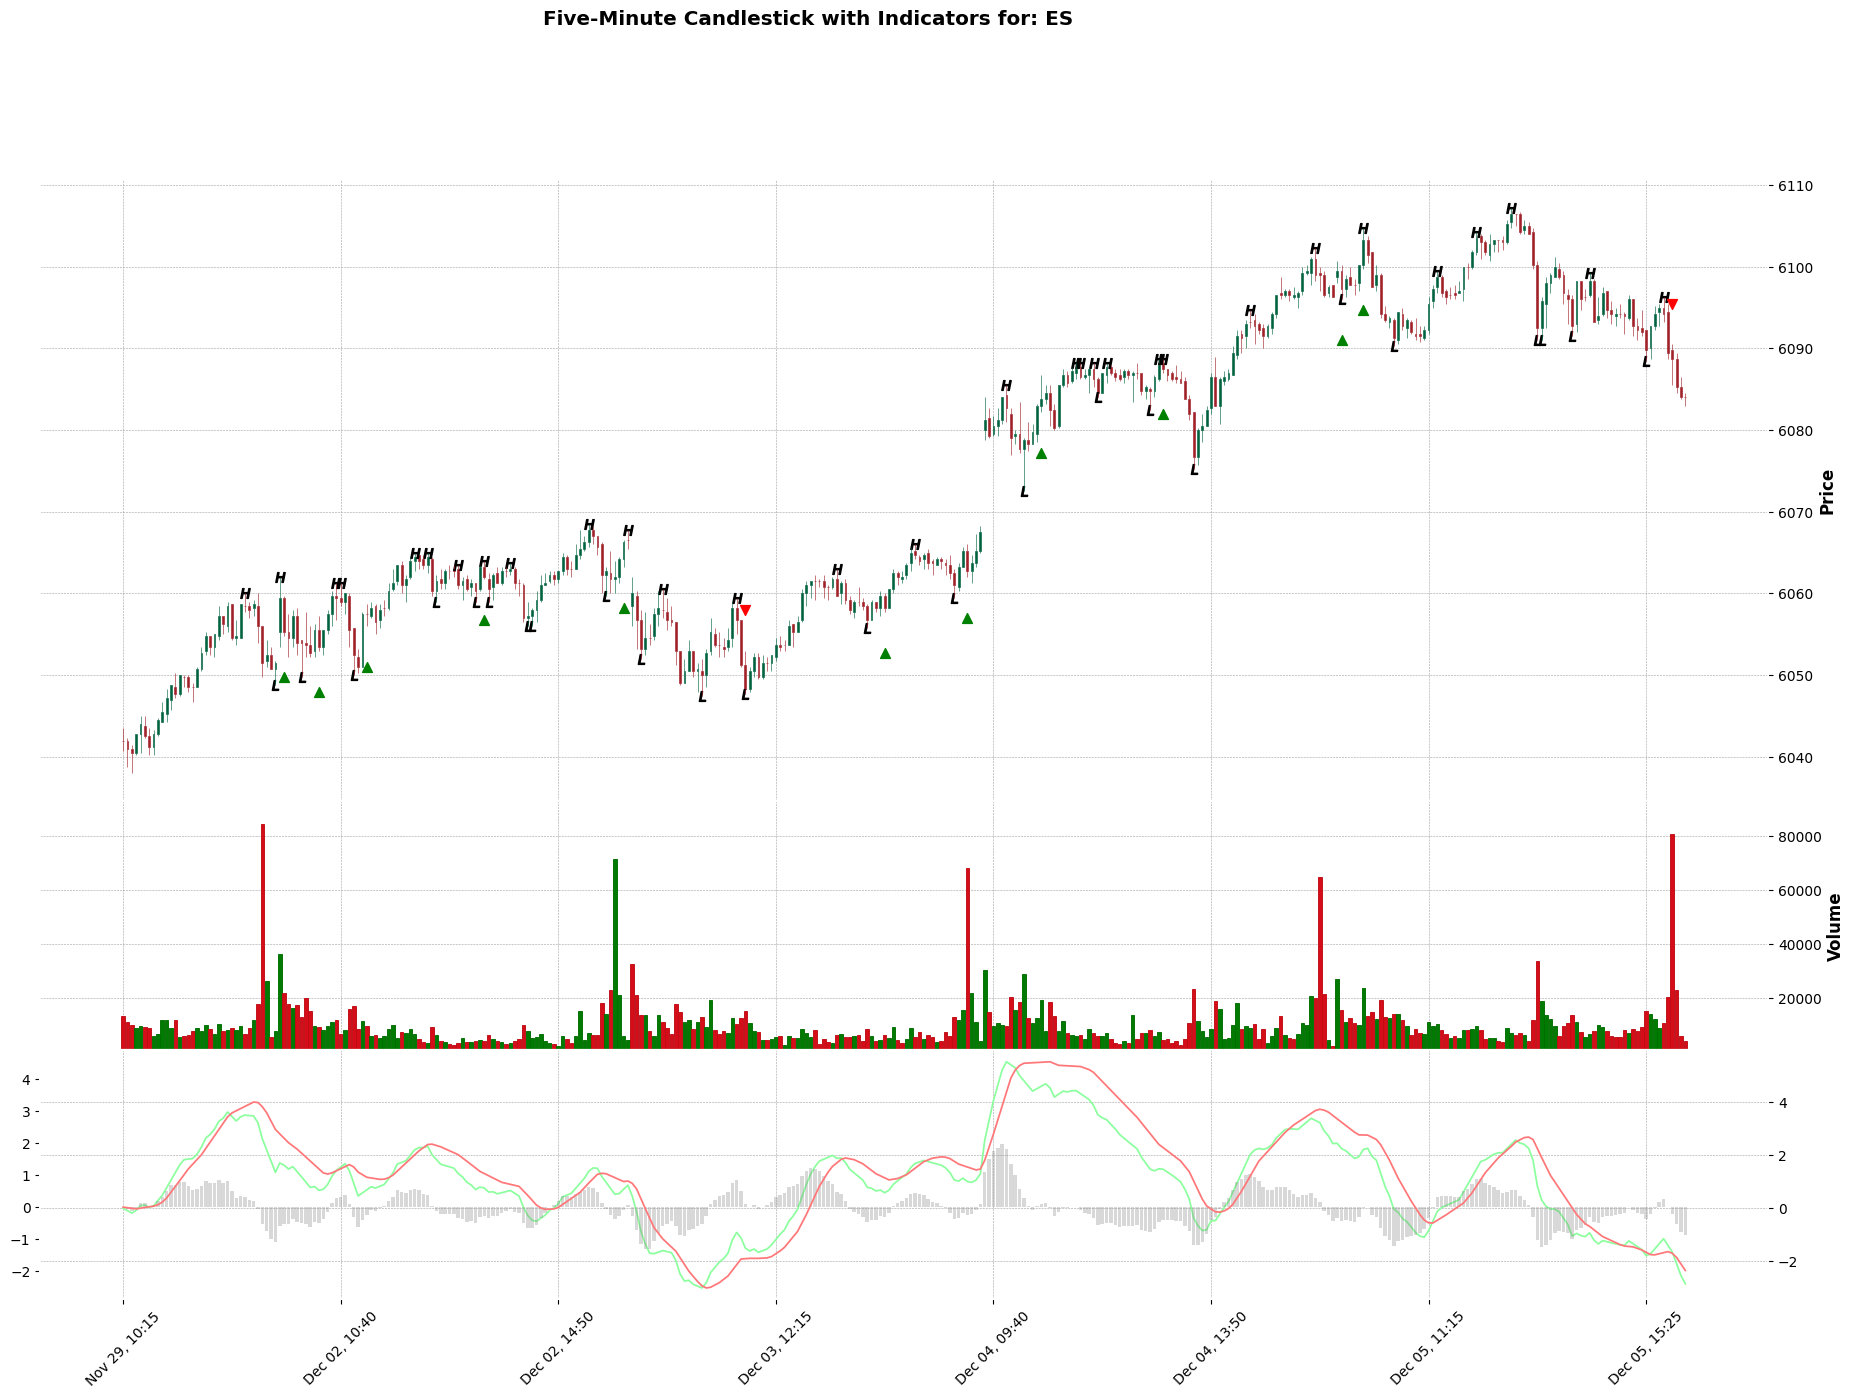

In [11]:
def main(df, ticker_name):
    # Step 1: Calculate pivots (Highs and Lows)
    pivots_high, pivots_low = calculate_pivots(df)

    # Step 2: Calculate MACD and histogram
    macd, signal, hist = calculate_macd(df)

    # Step 3: Identify pullback bounces
    pullback_bounce_up, pullback_bounce_dn = identify_trend_changes(macd)

    # Step 4: Plot the candlestick chart with indicators
    plot_candlestick_with_indicators(df, pivots_high, pivots_low, pullback_bounce_up, pullback_bounce_dn, macd, signal, hist, ticker_name)


# Run the code with your dataframe
main(df_es_processed.tail(360), 'ES')

### Back testing using all price bars from Dec 2023 to Dec 2024.

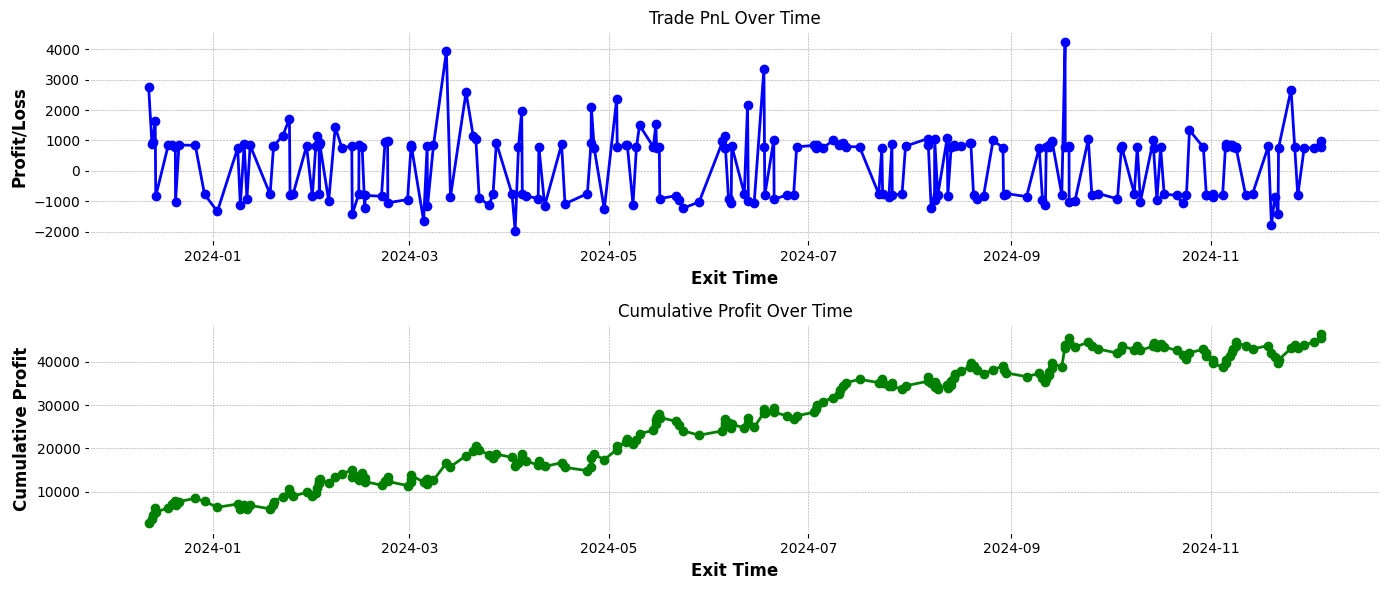

In [12]:
macd, signal, hist = calculate_macd(df_es_processed)

pullback_bounce_up, pullback_bounce_dn = identify_trend_changes(macd)

performance_metrics = execute_trading_strategy(df_es_processed, pullback_bounce_up, pullback_bounce_dn)


### Performance Summary

In [13]:
print(json.dumps(performance_metrics, sort_keys=True, indent=4))

{
    "avg_trade_duration": 31.34862385321101,
    "avg_trade_profit": 212.38532110091742,
    "max_drawdown": -6637.5,
    "net_profit": 46300.0,
    "num_trades": 218,
    "percent_profitable": 58.256880733944946
}


## Conclusion

With this exercise, we found a fairly effective and simple strategy that can achieve a 58% win rate with 1:1 risk to reward ratio. This translate into a net profit of 46K USD in a span of 1 year back testing trading the E-MINI S&P 500 Futures (50x leveraged according to contract specs). We showed that sometimes a simpler rule can generate powerful results in the settings of trading.

### Areas to improve

However, it is of course not perfect, and has way much rooms to improve.

1. We need more rigorous testing

  - We should back test over more historical data (5Y or 10Y+) to increase our confidence in our strategy.
  - And on top of that, we should forward test with paper money with new data that comes in every trading days for a extended period of time to prove the strategy is consistent and profitable.

2. In the back testing strategy itself, we should make adjustment based on the underlying asset we trade.
  - In the E-MINI S&P 500 Futures trading, we need to noticed that the contracts expires in every 3 months, during the contract switch period, the ES ticker sees a huge price jump that is purely due to the switch. We should exclude the profit made during such incidents.
3. We should also adjust back testing and forward testing to avoid news/event driven market trends
  - To test the pure price action strategy, we should avoid including the price trends driven by news events.
  - The easiest ones to exclude are the recent FOMC meetings driven upward trends due to rate cuts and election day related market movements.
4. Strategy Improvements
  - We can make the strategy more selective in entries by further incorporating the price pivot indicator.
  - In the pullback recognition, we used a strict value comparison over the recent consecutive MACD values to identify pullback trend. Instead, we can use linear regression to find such trend in MACD to tolerate fluctuations in MACD values.
  - There are a lot of hyper parameters that are set by our discretion. We can instead do a grid search to fit over a longer period of historical data.